## basics

https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm

- In statistics and statistical physics, the Metropolis–Hastings algorithm is a Markov chain Monte Carlo (MCMC) method for obtaining a sequence of random samples from a probability distribution from which direct sampling is difficult.
    - This sequence can be used to approximate the distribution (e.g. to generate a histogram)
    - or to compute an integral (e.g. an expected value).
- For single-dimensional distributions, there are usually other methods (e.g. adaptive rejection sampling) that can directly return **independent samples** from the distribution, and these are free from the problem of autocorrelated samples that is inherent in MCMC methods.
    - On the other hand, most simple rejection sampling methods suffer from the **"curse of dimensionality"**.

### examples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm import tqdm
from scipy.stats import gaussian_kde

$$
p(x)=0.7\cdot\mathcal N(x;0,1)+0.3\cdot\mathcal N(x;2.5,0.8)
$$

In [2]:
def target_distribution(x):
    """
    Target distribution: mixture of two Gaussians
    """
    return 0.7 * norm.pdf(x, loc=0, scale=1) + 0.3 * norm.pdf(x, loc=2.5, scale=0.8)

In [3]:
x = np.linspace(-4, 6, 1000)

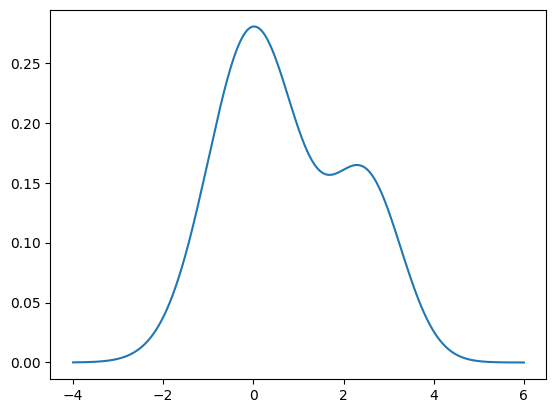

In [4]:
plt.plot(x, target_distribution(x))

In [5]:
def proposal_distribution(x, sigma=0.5):
    """
    Proposal distribution: Gaussian random walk
    """
    return np.random.normal(x, sigma)

In [7]:
def metropolis_hastings(n_samples):
    """
    Metropolis-Hastings algorithm implementation
    """
    samples = np.zeros(n_samples)
    current = np.random.normal(0, 1)  # Initial state
    
    for i in tqdm(range(n_samples), desc="Sampling"):
        proposed = proposal_distribution(current)
        
        # Calculate acceptance ratio
        ratio = target_distribution(proposed) / target_distribution(current)
        acceptance = min(1, ratio)
        
        # Accept or reject
        if np.random.random() < acceptance:
            current = proposed
        
        samples[i] = current
    
    return samples

Sampling: 100%|██████████| 50000/50000 [00:14<00:00, 3567.66it/s]


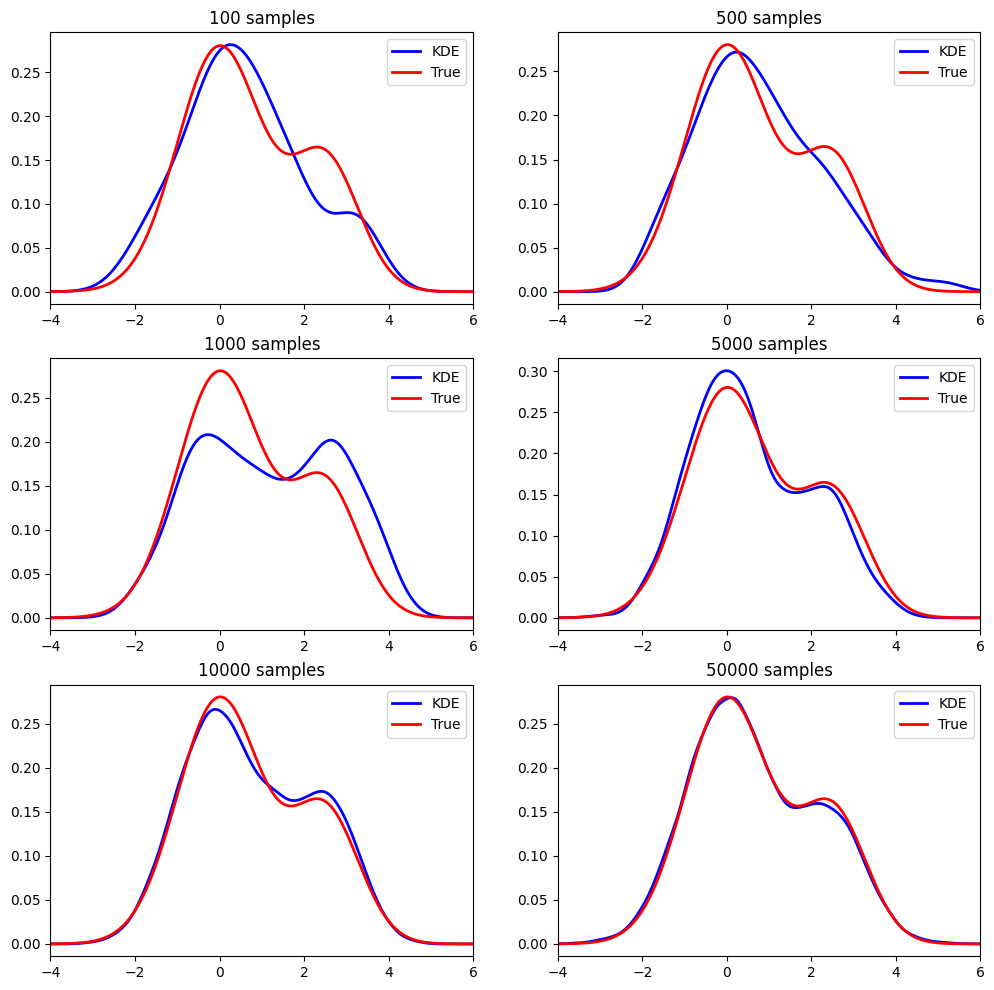

In [9]:
# Create subplot grid
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
sample_sizes = [100, 500, 1000, 5000, 10000, 50000]

# Generate plots for different sample sizes
x = np.linspace(-4, 6, 1000)
true_density = target_distribution(x)

for i, (ax, n_samples) in enumerate(zip(axes.flat, sample_sizes)):
    samples = metropolis_hastings(n_samples)
    
    # Plot histogram
    # ax.hist(samples, bins=50, density=True, alpha=0.5, color='blue', label='Histogram')
    
    # Add KDE plot
    kde = gaussian_kde(samples)
    kde_x = np.linspace(-4, 6, 200)
    ax.plot(kde_x, kde(kde_x), 'b-', lw=2, label='KDE')
    
    # Plot true density
    ax.plot(x, true_density, 'r-', lw=2, label='True')
    
    ax.set_xlim(-4, 6)
    # ax.set_ylim(0, 0.5)
    ax.set_title(f'{n_samples} samples')
    ax.legend()

### integral (expected value)

In [10]:
from scipy.integrate import quad

In [13]:
quad(lambda x: x*target_distribution(x), -np.inf, np.inf)[0]

0.75

In [14]:
0.7 * 0 + 0.3 * 2.5

0.75

In [15]:
def true_expectation(x):
    """
    Calculate the true expectation of the mixture distribution
    """
    # E[X] = 0.7 * E[N(0,1)] + 0.3 * E[N(2.5,0.8)]
    # For normal distribution, expectation is the mean
    return 0.7 * 0 + 0.3 * 2.5

def monte_carlo_expectation(samples):
    """
    Estimate expectation using Monte Carlo integration
    """
    return np.mean(samples)

In [18]:
true_exp = true_expectation(None)
print("True expectation:", true_exp)

True expectation: 0.75


In [19]:
for n_samples in sample_sizes:
    samples = metropolis_hastings(n_samples)
    mc_exp = monte_carlo_expectation(samples)
    print(f"Monte Carlo expectation ({n_samples} samples): {mc_exp:.4f}, "
          f"Error: {abs(mc_exp - true_exp):.4f}")

Sampling: 100%|██████████| 100/100 [00:00<00:00, 1181.69it/s]


Monte Carlo expectation (100 samples): 1.1913, Error: 0.4413


Sampling: 100%|██████████| 500/500 [00:00<00:00, 2225.35it/s]


Monte Carlo expectation (500 samples): 1.6711, Error: 0.9211


Sampling: 100%|██████████| 1000/1000 [00:00<00:00, 2193.81it/s]


Monte Carlo expectation (1000 samples): 0.9086, Error: 0.1586


Sampling: 100%|██████████| 5000/5000 [00:02<00:00, 2339.34it/s]


Monte Carlo expectation (5000 samples): 0.8781, Error: 0.1281


Sampling: 100%|██████████| 10000/10000 [00:02<00:00, 3373.62it/s]


Monte Carlo expectation (10000 samples): 0.6521, Error: 0.0979


Sampling: 100%|██████████| 50000/50000 [00:14<00:00, 3541.77it/s]

Monte Carlo expectation (50000 samples): 0.7529, Error: 0.0029
